In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Rocstories

In [2]:
lengths = [2, 4, 8, 16, 32, 64, 128]

In [3]:
CE_mauve = [
    0.069,
    0.070,
    0.101,
    0.294,
    0.680,
    0.770,
    0.800,
]

CE_ppl = [
    204.5,
    185.4,
    140.5,
    71.5,
    47.6,
    35.5
]

In [4]:
final_mauve = [
    0.172,
    0.197,
    0.403,
    0.836,
    0.901,
    0.923,
    0.940,
]
final_ppl = [
    109.5,
    70.1,
    51.9,
    30.2,
    27.3,
    26.7,
]

In [5]:
bert_ppl = 29.1
bert_mauve = 0.762

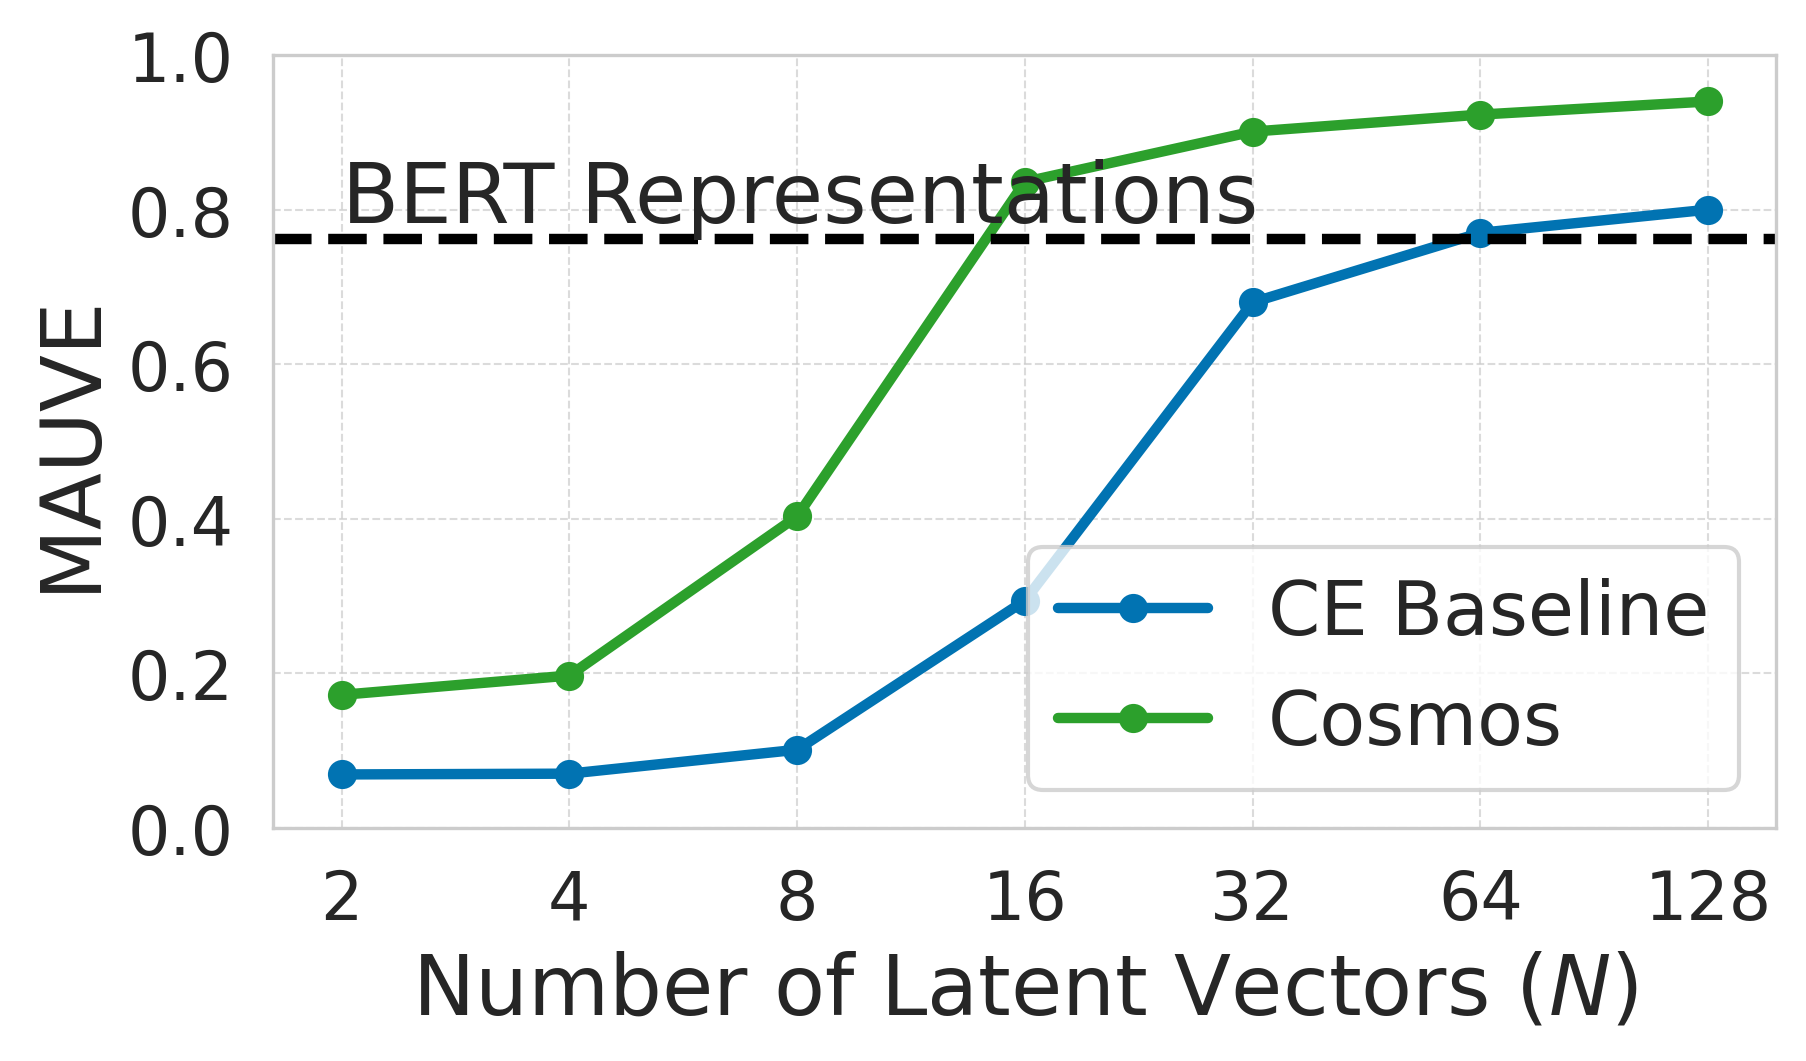

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 1. Global styling (match plot4)
sns.set_theme(style="whitegrid")
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Plot CE data
ax.plot(lengths, CE_mauve, 
        color='#0173b2',  # blue from plot4
        linestyle='-',
        marker='o',
        label='CE Baseline')

# Plot final data
ax.plot(lengths, final_mauve,
        color='#2ca02c',  # green from plot4
        linestyle='-',
        marker='o',
        label='Cosmos')

# Add BERT horizontal line
ax.axhline(y=bert_mauve, 
           color='black',  # red from plot4
           linestyle='--')
# Add BERT text label
ax.text(2, bert_mauve, 'BERT Representations', 
        ha='left', va='bottom',
        fontsize=20,
        bbox=dict(
            facecolor='none', 
            edgecolor='none',
            alpha=0.7))


# 4. Formatting
ax.set_xlabel('Number of Latent Vectors ($N$)')
ax.set_ylabel('MAUVE')
ax.set_xscale('log')
ax.set_xticks(lengths)
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_ylim(0, 1)

# 5. Grid style (match plot4)
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# 6. Legend
ax.legend(
#     title='Configuration',
         title_fontsize=20,
         loc='lower right',
         frameon=True)

# 7. Save & show
plt.tight_layout()
width_px, height_px = 3500, 2000
save_dpi = 600
plt.gcf().set_size_inches(width_px / save_dpi, height_px / save_dpi)
plt.savefig("./mauve_across_lengths.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [6]:
metric_data = {
    "ce": {
        "ppl": CE_ppl,
        "mauve": CE_mauve,
    },
    "final": {
        "ppl": final_ppl,
        "mauve": final_mauve,
    },
}

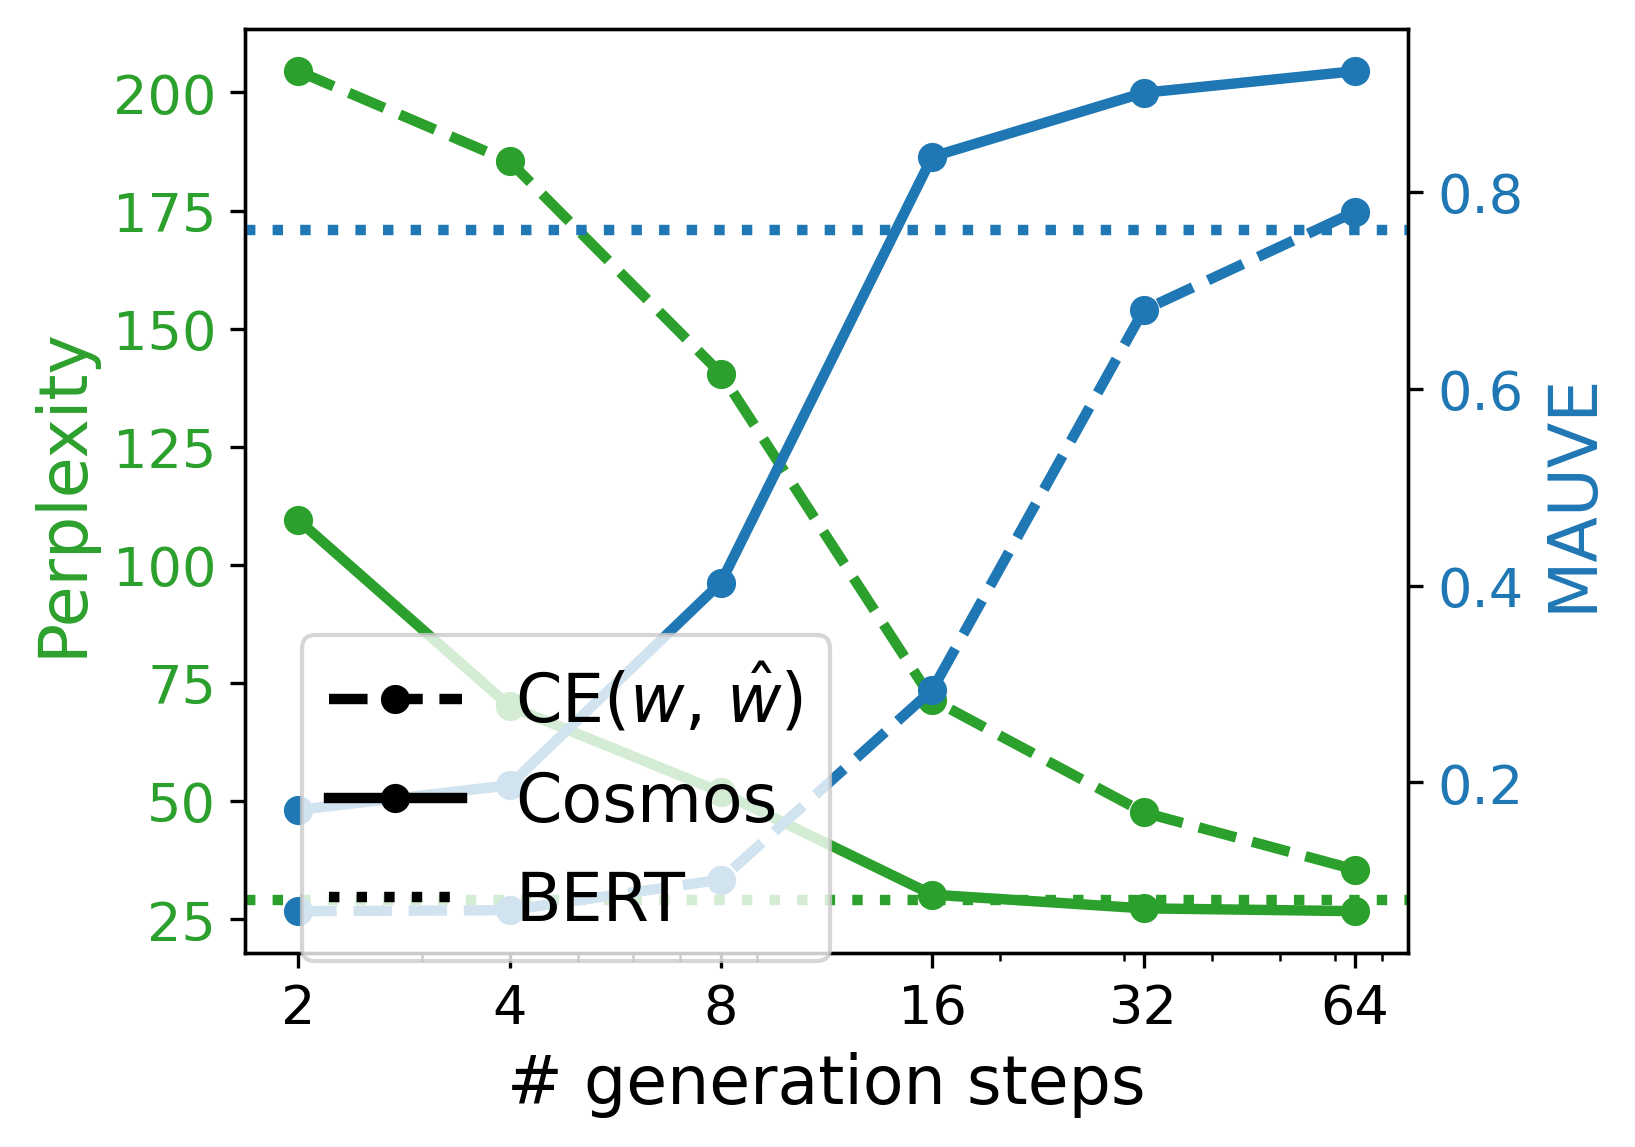

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 1. Global styling (match plot3)
# sns.set_theme(style="whitegrid")
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'axes.linewidth': 0.8,
    # 'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})


fig, ax1 = plt.subplots(figsize=(5, 4))
colors = ['tab:green', 'tab:blue']

ax = ax1
x = lengths

for j, metric in enumerate(['ppl', 'mauve']):
    for i, name in enumerate(['ce', 'final']):
        data = metric_data[name]
        marker = 'o'
        label = 'CE($w$, $\\hat{w}$)' if name == 'ce' else 'Cosmos'
        linestyle = '--' if name == 'ce' else '-'
        
        ax.plot(x, data[metric], color=colors[j], marker=marker, linestyle=linestyle, label=label)
    
    if j == 0:
        ax2 = ax1.twinx()
        ax = ax2

# Add horizontal lines for BERT metrics
ax1.axhline(y=bert_ppl, color=colors[0], linestyle=':', label='BERT')
ax2.axhline(y=bert_mauve, color=colors[1], linestyle=':', label='BERT')

ax2.set_xscale('log')
ax2.legend(loc='upper left', bbox_to_anchor=(0.02, 0.09, 0.88, 0.29), fontsize=16)
ax2.set_xticks(x)
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_xlabel('# generation steps', size=16)
ax1.set_ylabel('Perplexity', size=16, color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0], labelsize=13)

ax2.set_ylabel('MAUVE', size=16, color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1], labelsize=13)

ax1.tick_params(axis='x', labelsize=13)

leg = ax2.get_legend()
for handle in leg.get_lines():
    handle.set_color('black')

plt.savefig('rocstories_lengths.pdf', format='pdf', transparent=True, bbox_inches='tight')